# Lattice Dynamics and Density Functional Perturbation Theory - Quasi-Harmonic Level

The script 'thermodyanmics.py' is a comprehensive module for lattice dynamics based on harmonic and quasi-harmonic level of theory. For simplicity, this tutorial is focused only on quasi-harmonic fittings of phonons and thermodynamics of that level. For harmonic part, please refer to 'thermodynamics-QHA'.

**Classes used in this tutorial are defined in 'crystal_functions.thermodynamics'. Documentations and source codes are attached at the bottom of this page.**

## Tests
2 tests are performed based on the same method.

1. 0 pressure equilibrium volumes of Form I paracetamol, ranging from 0K to 330K. Compared with experimental measurements ([C. C. Wilson, Z. Kristallogr. Cryst. Mater., 2000, 215, 693–701](https://www.degruyter.com/document/doi/10.1524/zkri.2000.215.11.693/html)).  
2. 0\~1GPa thermodynamic properties of Form I paracetamol, ranging from 0K to 330K. As an illustration of the complete output file. 

Another test is performed to illustrate the compatibility with QHA output.

1. 0\~1GPa, 0\~1000K thermal expansions of corundum. QHA output available on [crystal tutorial website](https://tutorials.crystalsolutions.eu/tutorials/Tutorial_QHA/AL2O3_SC30_QHA.out).

Method explanation:

* Analytical expression of electron total energy is fitted to the third-order Birch-Murnaghan equation of states.  
* Analytical expression of phonon frequencies is fitted to the second- and third-order polynomials. The third -order polynomial is used for thermodynamics.  
* Gibbs free energy G(T, p) is minimized with BFGS algorithm without boundary conditions. 

**N.B.** This module is still under development. Planned update: Gruneisen model and anisotropic thermal expansion.

### 0\~330K, 0 pressure thermodyanmics
This part is used for comparison with experimental measurements, in order to illustrate effectiveness of QHA method implemented here. 4 $\Gamma$-point phonon calculations of Form I paracetamol with various volumes are used ('QHA' folder in 'data/').

In [2]:
import numpy as np
from crystal_functions.thermodynamics import Quasi_harmonic

file_list = ['data/QHA/f1-m4freq.out', 'data/QHA/f1-p4freq.out',
             'data/QHA/f1-p8freq.out', 'data/QHA/f1-r0freq.out']
tempt = np.array([20, 50, 80, 150, 200, 250, 330], dtype=float)
press = np.linspace(0, 1, 11)

qha = Quasi_harmonic(write_out=True, filename='data/f1-thermo-QHA.dat').from_HA_files(file_list, overlap=0.4)
qha.thermodynamics(temperature=tempt, pressure=press, eos_method='birch_murnaghan', 
                   poly_order=[2, 3], min_method='BFGS')

/home/huanyu/Software/anaconda3/envs/crystal_py3.8/lib/python3.8/site-packages/crystal_functions/thermodynamics.py:982: UserWarning: Close overlap of phonon modes detected at qpoint: 0 , 154 overlaps out of 240 modes.
  warnings.warn(
/home/huanyu/Software/anaconda3/envs/crystal_py3.8/lib/python3.8/site-packages/crystal_functions/thermodynamics.py:1416: UserWarning:   Volume: 735.6381810735967  Temperature: 20.0  Pressure: 0.6000000000000001
  warnings.warn('  Volume: ' + str(params['vol'].x[0]) + '  Temperature: ' + str(t) + '  Pressure: ' + str(p))
/home/huanyu/Software/anaconda3/envs/crystal_py3.8/lib/python3.8/site-packages/crystal_functions/thermodynamics.py:1416: UserWarning:   Volume: 736.2250471282783  Temperature: 50.0  Pressure: 0.6000000000000001
  warnings.warn('  Volume: ' + str(params['vol'].x[0]) + '  Temperature: ' + str(t) + '  Pressure: ' + str(p))
/home/huanyu/Software/anaconda3/envs/crystal_py3.8/lib/python3.8/site-packages/crystal_functions/thermodynamics.py:1416: 

Warning messages are printed out since the fitted volume data exceeds the sampled volume data, which might cause inaccuracies due to the extrapolated volume & phonon frequencies. According to warning messages, smaller volumes should be sampled when generating the phonon frequency data. However, tests show that moderate extrapolation tend to not severely deteriorate the results, therefore, a warning, instead of an error, is used.

No warning message is printed out for 0 pressure thermodynamics. Fitted data and expermiental data are plotted for comparison in the following code block. The difference is <= 5 cm^3/mol, which is a good agreement with experimental measurements. The increased thermal expansion around 50\~150K is reproduced.

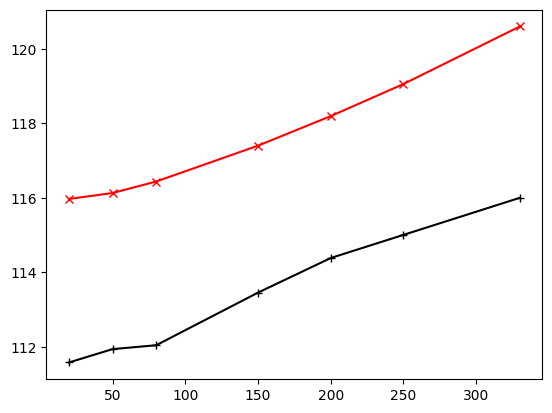

In [4]:
import matplotlib.pyplot as plt

exp = np.array([111.5836, 111.9421, 112.0463, 113.4580, 114.3871, 
                115.0082, 116.0031])
qha_zerop = qha.equilibrium_volume[0, :]
# Angstrom^3 to cm^3/mol
qha_zerop = qha_zerop * 0.602214 / 4

plt.plot(tempt, exp, '+-k')
plt.plot(tempt, qha_zerop, 'x-r')

### 0\~330K, 0\~1GPa thermodyanmics
The format of the output file obtained from the previous calculation (f1-thermo-QHA.dat) is briefly explained in this section. Generally speaking, titles of each section are printed in upper case, with '\#' at the beginning of the line. Brief explanations, if necessary, are given in the following lines in the lower case. 

Following information is reported in sequence:

#### Combined HA phonon data

1. Volumes of sampled HA phonons  
2. DFT total energies of sampled HA phonons  
3. Mode frequencies as functions of volumes

```
# COMBINED QHA DATA
## SAMPLED VOLUMES(ANGSTROM^3) =
## DFT TOTAL ENERGIES(KJ/MOL CELL) =
## DFT TOTAL ENERGIES(KJ/MOL CELL) =

## COMBINED MODES

### FREQUENCIES AT QPOINT #

  Mode #    Volume(Angstrom^3)        Frequency(THz)
```

#### Equation of states fitted for DFT total energy
To get the analytical expression of internal energy as the function of volume, U(V), excluding the zero point energy, the DFT total energy is fitted to equation of states (EoS) specified. The [pymatgen.analysis.eos module](https://pymatgen.org/pymatgen.analysis.eos.html) is integrated, so EoSs supported there are supported here as well. 

The following parameters are fitted:

1. $E_{0}$, The equilibrium internal energy excluding phonon vibrations.  
2. $V_{0}$, The equilibrium volume fitted to minimize the internal energy. Compared to $V_{0}$ that minimizes Gibbs free energy, there is a famous 'volume shift' problem of this value.  
3. $B_{0}$, The equilibrium bulk modulus.  
4. $B_{1}=\left(\frac{\partial B_{0}}{\partial p}\right)_{T}$

```
# EQUATION OF STATES FITTED FOR ELECTRON TOTAL ENERGY: birch_murnaghan
  Electron total energy is fitted as the function of volume, of which the
  formalism is given by equation of states.

      E0(kJ/mol)  V0(Angstrom^3)     B0(GPa)          B1
```

#### Polynomial fit of phonon frequency
The polynomial fitting of phonon frequency as the function of volume based on perturbation, $\Delta[crystal tutorial website](https://tutorials.crystalsolutions.eu/tutorials/Tutorial_QHA/AL2O3_SC30_QHA.out)\omega(V-V_{0})$, is implemented. 

Two sub-sections are printed. The first sub-section is printed during the fitting. The following parameters are printed for future evaluation:

1. Mode number  
2. Order of polynomial  
3. The fitting goodness R^2. $r^{2}=1-\frac{\sigma_{res}}{\sigma_{tot}}=1-\frac{\sum^{n}\left(\omega_{i}^{0}-\omega_{i}^{fit}\right)^{2}}{\sum^{n}\left(\omega_{i}^{0}-\bar{\omega^{0}}\right)^{2}}$  
4. Coefficients of the polynomial. Listed from left to the right from the 0-order term to the highest order term

```
# POLYNOMIAL FIT OF MODE FREQUENCY
  Frequency of each vibrational mode is fitted as the polynomial function of
  volume, with specified orders of power.

## POLYNOMIAL FIT AT QPOINT #
  Mode #  Order           R^2  Coeff low to high
```

The second sub-section is printed out after finishing all the fittings. The overall fitting goodness (the average of R^2 of all modes) at each q point is collected for comparison. 

```
## POLYNOMIAL FIT GOODNESS AT QPOINT #       
  Order           R^2
```

#### QHA thermodynamic properties

Basic thermodynamic properties including equilibrium volumes $V(T,p)$, Helmholtz free energy $F(T,V)$, Gibbs free energy $G(T,p)$ and entropy $S(T,V)$ are printed out at finite temperatures and pressures. 

So far, $V(T,p)$ is the basic quantity of all the other thermodynamic properties, which is obtained by numerically minimizing the Gibbs free energy of harmonic phonons (see [thermo-HA](https://github.com/crystal-code-tools/crystal_functions/blob/main/tutorial/thermo-HA.ipynb) for analytical equations). 

The following information is printed out:

1. The order of polynomials used for QHA thermodynamics, which is automatically chosen based on the average R^2.  
2. Algorithm used for minimizing Gibbs free energy.  
3. If applicable, volume boundaries set for Gibbs free energy minimization.  
4. Thermodynamic properties at constant pressure.

```
# QHA THERMODYNAMIC PROPERTIES
  Thermodynamic properties fitted by QHA.

## FREQUENCY POLYNOMIAL ORDER:
## EQUILIBRIUM VOLUME MINIMISATION: 
## THERMODYNAMIC PROPERTIES AT         GPa

      T(K)     Vol(Angstrom^3)   Helmholtz(kJ/mol)       Gibbs(kJ/mol)    Entropy(J/mol*K)
```

### 0\~1000K, 0\~1GPa thermal expansion of corundum

This test is to illustrate the compability of crystal_functions with QHA output from CRYSTAL. Due to the finite changes in volume, the interation cut-off threshold might change with the geometry, leading to noises on the potential energy surface. See 'FIXINDEX' in CRYSTAL manual. Therefore, to obtain a smooth energy surface, QHA output, rather than multiple HA outputs, is always preferred. 

/home/huanyu/Software/anaconda3/envs/crystal_py3.8/lib/python3.8/site-packages/crystal_functions/thermodynamics.py:982: UserWarning: Close overlap of phonon modes detected at qpoint: 0 , 34 overlaps out of 90 modes.
  warnings.warn(


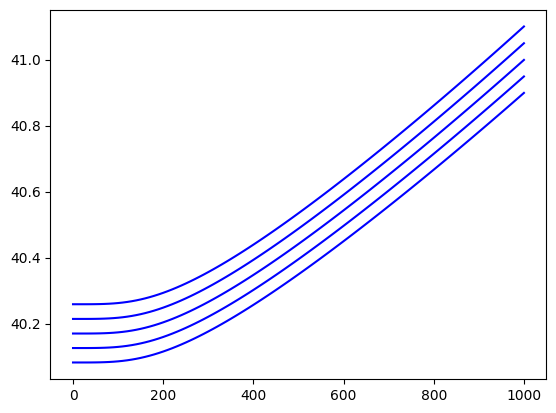

In [6]:
import numpy as np
from crystal_functions.thermodynamics import Quasi_harmonic
import matplotlib.pyplot as plt

file = 'data/corundum.out'
tempt = np.linspace(0, 1000, 101)
press = np.linspace(0, 1, 5)

qha = Quasi_harmonic(write_out=False).from_QHA_file(file)
qha.thermodynamics(temperature=tempt, pressure=press, eos_method='birch_murnaghan', 
                   poly_order=[3], min_method='BFGS')

for v_p in qha.equilibrium_volume:
    v_p = v_p * 0.602214 / 4 # Angstrom^3 to cm^3/mol
    plt.plot(tempt, v_p, '-b')

## Class Mode
The basic definitions of a single vibrational mode at the given q point. It can be used for both HA and QHA levels of theory. Mode objects cannot be used for writing data output and calculating the thermodyanmics of the whole system. It can only be used to calculate the thermodynamics of a single phonon. Therefore, a 'shell' (e.g., 'Harmonic' object, see below) is needed to sum up individual phonons. For simplicity, attributes specifically for QHA are listed here. For other attributes, see [thermo-HA](https://github.com/crystal-code-tools/crystal_functions/blob/main/tutorial/thermo-HA.ipynb).

### Methods for QHA
#### `self.polynomial_fit(eq_point, order=[2, 3])`
Limited to ncalc > 1 cases.Fit phonon frequency as the polynomial function of volume. 

Input:
- `eq_point` The DFT total energy minimum point with equilibrium volume.
- `order` The list of orders of polynomials to be fitted.

Output attributes:
- `self.poly_fit` The dictionary of numpy polynomial objects. Key: orders of power, Value: fitted polynomials
- `self.poly_fit_rsquare` The dictionary of the goodness of fittings, characterized by R^2. Key: orders of power, Value: R^2

In [ ]:
    def polynomial_fit(self, eq_point, order=[2, 3]):
        """
        Fit phonon frequency as the polynomial function of volume with
        perturbation theory. Limited to ncalc > 1 cases.

        Input:
            eq_point, int, The DFT total energy minimum point with equilibrium
                           volume
            order, norder * 1 list, The orders of polynomials to be fitted.
        Output:
            self.poly_fit, norder * 1 dictionary, the dictionary of numpy
                           polynomial objects. Key: orders of power, Value:
                           fitted polynomials
            self.poly_fit_rsquare, norder * 1 dictionary, the dictionary of the
                                   goodness of fittings, characterized by R^2.
        """
        import numpy as np
        import warnings

        if self.ncalc <= 1:
            raise Exception('This modulus is limited to multiple frequency calculations.')

        if max(order) > self.ncalc - 1:
            warnings.warn('Reference data not sufficient for the order of polynomial fitting.')
            warnings.warn('Too high values will be removed.')

        order = list(set(order))
        order = [p for p in order if p <= self.ncalc - 1]

        self.poly_fit = {}
        self.poly_fit_rsqaure = {}
        
        vol_fit = self.volume - self.volume[eq_point]
        freq_fit = self.frequency - self.frequency[eq_point]

        for i in order:
            func = np.polynomial.polynomial.Polynomial.fit(vol_fit, freq_fit, i)
            self.poly_fit.update({i: func})
            if np.all(abs(self.frequency) < 1E-4):
                r_square = 1.
            else:
                ss_res = np.sum((self.frequency - func(self.volume))**2)
                ss_tot = np.sum((self.frequency - np.mean(self.frequency))**2)
                r_square = 1 - ss_res / ss_tot

            self.poly_fit_rsqaure.update({i: r_square})

        return order, self.poly_fit, self.poly_fit_rsqaure


## Class Quasi_harmonic
Generate and arrange harmonic phonons, store the fitted, volume-dependent QHA phonon information and obtain the QHA thermodynamic properties. In the current implementation, individual harmonic phonon calculation files are accepted. QHA output from CRYSTAL is not supported. 

### Initialization
#### `__init__(temperature=[], pressure=[], write_out=True, filename='QHA-Fit.dat')`  
Same as Haromonic class. See [thermo-HA](https://github.com/crystal-code-tools/crystal_functions/blob/main/tutorial/thermo-HA.ipynb)

In [ ]:
class Quasi_harmonic:
    """
    Class Quasi_haromic - Generate and arrange harmonic phonons, store the
    fitted, volume dependent QHA phonon information and obtain the QHA
    thermodynamic properties.

    self.ncalc, from_HA_files, The number of phonon calculations.
    self.combined_phonon, from_HA_files, Sampled calculation as Harmonic object
    self.combined_volume, from_HA_files, A list of volumes.
    self.combined_edft, from_HA_files, A list of DFT total energies.
    self.combined_mode, from_HA_files, A list of mode objects.
    self.eos_method, edft_eos_fit, Fitting method of equation of states
    self.eos, edft_eos_fit, Fitted equation of states
    self.fit_order, freq_polynomial_fit, The optimal order of polynomial fit
    self.temerature, thermodynamics, Temperature series. Unit: K
    self.pressure, thermodynamics, Pressure series. Unit: GPa
    self.equilibrium_volume, thermodynamics, V(T, p). Unit: Angstrom^3
    self.helmholtz, thermodynamics, F(T, V). Unit: kJ/mol
    self.gibbs, thermodynamics, G(T, p). Unit: kJ/mol
    self.entropy, thermodynamics, S(T, V). Unit: J/mol*K
    """

    def __init__(self, temperature=[], pressure=[], 
                 write_out=True, filename='QHA-Fit.dat'):
        """
        Initialization.
        
        Input:
            temperature, nTempt * 1 array / list, Temperatures where the
                         thermodynamic properties are computed. Unit: K
            pressure, npress * 1 array / list, Pressures where the
                      thermodyanmic properties are calculated. Unit: GPa
            write_out, bool, Whether to record the key information into a file.
            filename, str, Name of the printed-out file, used only if
                      write_out = True.
        Note: Temperature can also be defined in 'thermodynamics' method, which
              will cover the settings during initialisation.
        Output: 
            -
        """
        import numpy as np
        
        if len(temperature) > 0:
            self.temperature = np.array(temperature, dtype=float)
        
        if len(pressure) > 0:
            self.pressure = np.array(pressure, dtype=float)

        self.write_out = write_out
        if self.write_out:
            self.filename = filename
        else:
            self.filename = 'no file'


### Methods
#### `self.from_HA_files(input_files, scelphono=[],overlap=0.4)`
Read data from individual HA calculation outputs. 

Inputs:

- `input_files` List of paths to HA input files  
- `scelphono` The 'SCELPHONO' keyword of CRYSTAL17 input. Empty input implies no supercell expansion is used
- `overlap` The threshold of close mode overlaps. See `_phonon_continuity`

Output attributes:

- `self.ncalc` Number of HA phonon calculations, i.e., the number of input files
- `self.combined_phonon` See `_combine_data`
- `self.combined_volume` See `_combine_data`
- `self.combined_edft` See `_combine_data`
- `self.combined_mode` See `_combine_data`

In [ ]:
    def from_HA_files(self, input_files, scelphono=[], overlap=0.4):
        """
        Read data from individual HA calculation outputs.

        Input:
            input_files, ncalc*1 list, List of phonon output filenames.
            scelphono, ndimen*ndimen or 3*3 list / array, Same to the
                       'SCELPHONO' keyword of CRYSTAL17 input.
            overlap, float, The threshold of close mode overlaps
        Output:
            self.ncalc, int, Number of HA phonon calculations.
            self.combined_phonon, self.combined_volume, self.combined_edft,
            self.combined_mode, refer the method 'combine_data'
        """
        from crystal_functions.thermodynamics import Harmonic
        import warnings

        if hasattr(self, "ncalc"):
            warnings.warn('Data exists. The current command will be ignored.')

            return self

        self.ncalc = len(input_files)
        if self.ncalc == 1:
            warnings.warn('Single frequency calculation detected! QHA is deteriorated to HA.')

        ha_list = [
            Harmonic(write_out=False).from_file(
                file,
                scelphono=scelphono, 
                read_eigenvector=True,
                auto_calc=False
            ) for file in input_files
        ]
        
        self.combined_phonon, self.combined_volume, self.combined_edft, \
        self.combined_mode = self._combine_data(ha_list, overlap=overlap)

        return self

#### `self.from_QHA_file(input_file, scelphono=[],overlap=0.4)`
Read data from a single QHA calculation at Gamma point. 

Inputs:

- `input_file` Name of QHA output file. Only 1 file is permitted

Others are consistent with `from_HA_files`

In [ ]:
    def from_QHA_file(self, input_file, scelphono=[], overlap=0.4):
        """
        Read data from a single QHA calculation at Gamma point.
        
        Input:
            input_file, string or 1*1 list, Name of QHA output file. Only 1
                        file is permitted

        Other Input/output are consistent with 'from_HA_files'
        """
        from crystal_functions.file_readwrite import Crystal_output
        from crystal_functions.thermodynamics import Harmonic
        from crystal_functions.thermodynamics import Mode
        import warnings
        import re
        import numpy as np
        from pymatgen.core import Structure
        
        if hasattr(self, "ncalc"):
            warnings.warn('Data exists. The current command will be ignored.')
            return self
        
        if isinstance(input_file, list) and len(input_file) > 1:
            raise Exception("Only a single QHA file is permitted")
        elif isinstance(input_file, list) and len(input_file) == 1:
            input_file = input_file[0]
        
        file = Crystal_output().read_cry_output(input_file)
        file.get_mode()
        file.get_eigenvector()
        file.clean_imaginary()
        
        # Get volume/structure/dimensionality. Only to be used with QHA files
        structures = []
        for idx_line, line in enumerate(file.data): 
            if re.match(
                r'^\s+GEOMETRY\sFOR\sWAVE\sFUNCTION\s\-\sDIMENSIONALITY', line
            ):
                ndimen = int(line.strip().split()[9])
            elif re.match(
                r'^\s+DIRECT\sLATTICE\sVECTORS\sCARTESIAN\sCOMPONENTS\s\(ANGSTROM\)',
                line
            ):
                idx_line += 2
                vec1 = np.array(file.data[idx_line].strip().split()[0:3], dtype=float)
                vec2 = np.array(file.data[idx_line + 1].strip().split()[0:3], dtype=float)
                vec3 = np.array(file.data[idx_line + 2].strip().split()[0:3], dtype=float)

                idx_line += 9
                all_species = []
                all_coords = np.array([], dtype=float)
                while re.match(
                    r'^\s+[0-9]+\s+[0-9]+\s+[A-Z]+', file.data[idx_line]
                ):
                    line_info = file.data[idx_line].strip().split()
                    all_coords = np.append(all_coords, np.array(line_info[3:], dtype=float))
                    all_species.append(line_info[2].capitalize())
                    idx_line += 1
                
                all_coords = np.reshape(all_coords, [-1, 3])
                
                scell_mx = np.eye(3, dtype=float)
                if scelphono:
                    scell_mx[: ndimen, : ndimen] = np.array(scelphono)[: ndimen, : ndimen]
                    shrink_mx = np.linalg.pinv(scell_mx)
                    pcel_lattice = np.dot(np.stack([vec1, vec2, vec3]), shrink_mx)
                    all_coords = np.dot(all_coords, np.linalg.pinv(pcel_lattice)).tolist()

                    pcel_coord = []
                    pcel_species = []
                    for i, coord in enumerate(all_coords):
                        if any(x > 0.5 or x <= -0.5 for x in coord):
                            continue
                        else:
                            pcel_coord.append(coord)
                            pcel_species.append(all_species[i])
                
                else:
                    pcel_lattice = np.stack([vec1, vec2, vec3])
                    pcel_coord = all_coords
                    pcel_species = all_species

                struc = Structure(lattice=pcel_lattice, species=pcel_species, 
                                  coords=pcel_coord, coords_are_cartesian=False)
                structures.append(struc) 
            else:
                continue

        self.ncalc = file.nqpoint
        ha_list = []
        for idx_c in range(self.ncalc):
            ha = Harmonic(write_out=False)
            ha.structure = structures[idx_c + 1] # The first one is pre-opt geom
            ha.natom = len(ha.structure.species)
            ha.volume = ha.structure.lattice.volume
            ha.edft = file.edft[idx_c]
            ha.nqpoint = 1
            ha.qpoint = [0, 0, 0]
            ha.nmode = np.array([file.nmode[idx_c]])
            ha.frequency = np.array([file.frequency[idx_c]])
            ha.eigenvector = np.array([file.eigenvector[idx_c]])
            ha_list.append(ha)
        
        self.combined_phonon, self.combined_volume, self.combined_edft, \
        self.combined_mode = self._combine_data(ha_list, overlap=overlap)
        
        return self

#### `self._combine_data(ha_list, overlap)`

Combine the HA calculation data and rearrange it according to modes. Not a standalone method.

Inputs:

- `ha_list` The list of crystal_functions.thermodynamics.Harmonic objects
- `overlap` See `_phonon_continuity`

Outputs:

- `combined_phonon` List of Harmonic objects, i.e., sampled calculations
- `combined_volume` List of sampled volumes. Unit: Angstrom^3
- `combined_edft` List of sampled electron total energies. Unit: kJ/mol
- `combined_mode` List of mode objects. Each mode object stands for a vibrational mode at the given q point and stores ncalc HA values for volume, frequency and eigenvector.

All the combined properties are arranged in volume ascending order.

In [ ]:
    def _combine_data(self, ha_list, overlap):
        """
        Combine the HA calculation data and rearrange it according to modes.
        Not a standalone method.

        NOTE: All the input data will be rearranged in the low-to-high sequence
              according to volumes.

        Input:
            ha_list, ncalc * 1 list, The list of harmonic objects.
            overlap, float, The threshold of close mode overlaps
        Output:
            combined_phonon, list of Harmonic objects, Sampled calculations
            combined_volume, ncalc * 1 list, A list of volumes.
                             Unit: Angstrom^3
            combined_edft, ncalc * 1 list, A list of DFT total energies.
                           Unit: KJ / mol cell
            combined_mode, nqpoint * nmode list, A list of mode objects. Each
                           mode object stands for a vibrational mode at the
                           given q point and stores ncalc HA values for volume,
                           frequency and eigenvector.
                           mode.volume: ncalc * 1 array
                           mode.frequency: ncalc * 1 array
                           mode.eigenvector: ncalc * natom * 3 array
        """
        import numpy as np
        import warnings
        from crystal_functions.thermodynamics import Mode

        # Sorting data according to volumes
        sorted_vol = np.zeros([self.ncalc, 2])
        nqpoint = ha_list[0].nqpoint
        nmode = ha_list[0].nmode  # nqpoint * 1 array
        natom = ha_list[0].natom  # int
        for index, ha_phonon in enumerate(ha_list):
            sorted_vol[index, :] = [index, ha_phonon.volume]
            # Check whether the numbers of modes and atoms are consistent.
            if (natom - ha_phonon.natom) != 0 or \
                not np.all((nmode - ha_phonon.nmode) == 0) or \
                nqpoint - ha_phonon.nqpoint != 0:
                raise Exception(
                    'The number of qpoints, modes or atoms is not consistent across the sampling points'
                )

        sorted_vol = sorted_vol[np.argsort(sorted_vol[:, 1])]
        nmode = nmode[0]

        combined_phonon = []
        # Volume, ncalc * 1 array
        combined_volume = np.zeros(self.ncalc)
        # DFT total energy, ncalc * 1 array
        combined_edft = np.zeros(self.ncalc)
        # Frequency, ncalc * nqpoint * nmode array
        combined_freq = np.zeros([self.ncalc, nqpoint, nmode])
        # Eigenvector, ncalc * nqpoint * nmode * natom * 3 array
        combined_eigvt = np.zeros([self.ncalc, nqpoint, nmode, natom, 3])
        for idx_new, idx_vol in enumerate(sorted_vol):
            ha_phonon = ha_list[int(idx_vol[0])]
            combined_phonon.append(ha_phonon)
            combined_volume[idx_new] = idx_vol[1]
            combined_edft[idx_new] = ha_phonon.edft
            combined_freq[idx_new] = ha_phonon.frequency
            combined_eigvt[idx_new] = ha_phonon.eigenvector
        
        # ncalc * nqpoint * nmode array to nqpoint * ncalc * nmode array
        combined_freq = np.transpose(combined_freq, axes=[1, 0, 2])
        # ncalc * nqpoint * nmode * natom * 3 array to 
        # nqpoint * ncalc * nmode * natom * 3 array
        combined_eigvt = np.transpose(combined_eigvt, axes=[1, 0, 2, 3, 4])
        close_overlap = np.zeros([nqpoint, self.ncalc, nmode, nmode])
        for idx_q in range(nqpoint):
            combined_freq[idx_q], combined_eigvt[idx_q], close_overlap[idx_q] \
                = self._phonon_continuity(combined_freq[idx_q], 
                                          combined_eigvt[idx_q], 
                                          overlap=overlap)
        # nqpoint * ncalc * nmode array to nqpoint * nmode * ncalc array
        combined_freq = np.transpose(combined_freq, axes=[0, 2, 1])
        # nqpoint * ncalc * nmode * natom * 3 array to 
        # nqpoint *  nmode * ncalc * natom * 3 array
        combined_eigvt = np.transpose(combined_eigvt, axes=[0, 2, 1, 3, 4])
        # nqpoint * ncalc * nmode_ref * nmode_sort array to
        # nqpoint * nmode_ref * ncalc * nmode_sort array
        close_overlap = np.transpose(close_overlap, axes=[0, 2, 1, 3])

        for idx_q, qpoint in enumerate(close_overlap):
            overlap_numbers = np.sum(qpoint)
            if overlap_numbers >= 1.:
                warnings.warn(
                    'Close overlap of phonon modes detected at qpoint: ' + str(idx_q) + ' , ' + str(int(overlap_numbers)) + ' overlaps out of ' + str(int(nqpoint * nmode)) + ' modes.'
                )

        combined_mode = []
        for idx_q in range(nqpoint):
            combined_mode_q = []
            for idx_m in range(nmode):
                combined_mode_q.append(
                    Mode(rank=idx_m + 1,
                         frequency=combined_freq[idx_q, idx_m, :],
                         volume=combined_volume,
                         eigenvector=combined_eigvt[idx_q, idx_m, :])
                )

            combined_mode.append(combined_mode_q)

        if self.write_out:
            file = open(self.filename, 'w')
            file.write('%s\n' % '# COMBINED QHA DATA')
            file.write('%s' % '## SAMPLED VOLUMES(ANGSTROM^3) = ')
            for v in combined_volume:
                file.write('%16.4e' % v)

            file.write('\n')

            file.write('%s' % '## DFT TOTAL ENERGIES(KJ/MOL CELL) = ')
            for e in combined_edft:
                file.write('%16.6e' % e)

            file.write('\n\n')

            file.write('%s\n\n' % '## COMBINED MODES')
            for idx_q, qpoint in enumerate(combined_mode):
                file.write('%-27s%8i\n' %
                           ('### FREQUENCIES AT QPOINT #', idx_q))
                for mode in qpoint:
                    file.write('\n%-8s%22s%22s\n' %
                               ('  Mode #', 'Volume(Angstrom^3)', 'Frequency(THz)'))

                    for i in range(self.ncalc):
                        if i == 0:
                            file.write('%8i' % mode.rank)
                        else:
                            file.write('%8s' % '')

                        file.write('%22.4f%22.4f\n' %
                                   (mode.volume[i], mode.frequency[i]))

                file.write('\n')
                
            file.write('%s\n\n' % '## CLOSE OVERLAPS OF PHONON FREQUENCIES')
            for idx_q, qpoint in enumerate(combined_mode):
                file.write('%-30s%8i\n\n' % 
                           ('### CLOSE OVERLAPS AT QPOINT #', idx_q))
                file.write('%-10s%2s%8s%2s%9s%2s%9s\n' % 
                           ('  Calc_Ref', '', 'Mode_Ref', '', 'Calc_Sort', 
                            '', 'Mode_Sort'))
                for idx_mref, mode in enumerate(qpoint):
                    if np.sum(close_overlap[idx_q, idx_mref]) < 1.:
                        continue

                    for idx_csort in range(1, self.ncalc):
                        for idx_msort in range(nmode):
                            if close_overlap[idx_q, idx_mref, idx_csort, idx_msort]:
                                file.write('%10i%2s%8i%2s%9i%2s%9i\n' % 
                                           (idx_mref + 1, '', idx_csort - 1, 
                                            '', idx_csort, '', idx_msort + 1))
                            else:
                                continue
                
                file.write('\n')

            file.close()

        return combined_phonon, combined_volume, combined_edft, combined_mode

#### `self._phonon_continuity(freq, eigvt, symm=None, overlap=0.4)`

Rearrange phonon modes by their continuity. If the difference between the maximum scalar product of correspondin eigenvectors (normalized to 1) and scalar products of other modes is less than 0.4, warning is printed due to the potential overlap of modes.

**The algorithm of this method is adopted from CRYSTAL17.**

Erba A. *J. Chem. Phys.*, 2014 **141** 124115.

Not a standalone method.

Inputs:

- `freq` Phonon frequencies.
- `eigvt` Eigenvectores normalized to 1 of corresponding modes
- `symm` Sub-group numbers of corresponding modes (Not supported at the current implementation)
- `overlap` The threshold of close mode overlaps

Outputs:

- `freq` Sorted phonon frequencies
- `eigvt` Sorted eigenvectores
- `close_overlap` Whether close overlap is identified at previous calculation and the current calculation.

In [ ]:
    def _phonon_continuity(self, freq, eigvt, symm=None, overlap=0.4):
        """
        Rearrange phonon modes by their continuity. If the difference between
        the maximum scalar product of correspondin eigenvectors (normalized to 
        1) and scalar products of other modes is less than 0.4, warning is
        printed due to the potential overlap of modes. Adopted from CRYSTAL17,
        
        Erba A. J. Chem. Phys., 2014 141 124115.

        Not a standalone method.
        
        Input:
            freq, ncalc * nmode array, Phonon frequencies.
            eigvt, ncalc * nmode * natom * 3 array, Eigenvectores normalized to
                   1 of corresponding modes
            symm, ncalc * nmode array, Sub-group numbers of corresponding modes
                  (Not supported at the current implementation)
            overlap, float, The threshold of close mode overlaps
        Output:
            freq, ncalc * nmode array, Sorted phonon frequencies
            eigvt, ncalc * nmode * natom * 3 array, Sorted eigenvectores
            close_overlap, ncalc * nmode * nmode boolian array, Whether close
                           overlap is identified at previous calculation (2nd 
                           dimension) and the current calculation (3rd).
        """
        import numpy as np
        
        # Exclude negative and 0 frequencies
        ncalc = len(freq)
        nmode = len(freq[0])
        ng_mode = 0
        for idx_c, calc in enumerate(freq):
            for idx_f, frequency in enumerate(calc):
                if np.isnan(frequency) or (frequency < 1e-4):
                    ng_mode_c = idx_f
                else:
                    break

            if ng_mode_c > ng_mode:
                ng_mode = ng_mode_c

        # Sort phonon
        products = np.zeros([ncalc, nmode])
        for sort_c in range(1, ncalc):
            ref_c = sort_c - 1
            for ref_m in range(ng_mode + 1, nmode):
                ref_pdt = 0.
                sort_m_save = 0
                for sort_m in range(ng_mode + 1, nmode):
                    if symm and symm[0, ref_m] != symm[sort_c, sort_m]:
                        continue

                    sort_pdt = abs(np.sum(
                        eigvt[ref_c, ref_m] * eigvt[sort_c, sort_m]
                    ))
                    if sort_pdt > ref_pdt:
                        if sort_m < ref_m:
                            check_pdt = abs(np.sum(
                                eigvt[ref_c, sort_m] * eigvt[sort_c, sort_m]
                            ))
                            
                            if check_pdt > sort_pdt:
                                continue

                        ref_pdt = sort_pdt
                        sort_m_save = sort_m

                products[sort_c, ref_m] = ref_pdt
                freq[[sort_c, sort_c], [sort_m_save, ref_m]] \
                    = freq[[sort_c, sort_c], [ref_m, sort_m_save]]
                eigvt[[sort_c, sort_c], [sort_m_save, ref_m]] \
                    = eigvt[[sort_c, sort_c], [ref_m, sort_m_save]]
                if symm:
                    symm[[sort_c, sort_c], [sort_m_save, ref_m]] \
                        = symm[[sort_c, sort_c], [ref_m, sort_m_save]]

        # Look for close overlaps
        close_overlap = np.zeros([ncalc, nmode, nmode])
        for sort_c in range(1, ncalc):
            ref_c = sort_c - 1
            for ref_m in range(ng_mode + 1, nmode):
                ref_pdt = products[sort_c, ref_m]
                for sort_m in range(ng_mode + 1, nmode):
                    if symm and symm[0, ref_m] != symm[sort_c, sort_m]:
                        continue
                    if sort_m == ref_m:
                        continue

                    sort_pdt = abs(np.sum(
                        eigvt[ref_c, ref_m] * eigvt[sort_c, sort_m]
                    ))
                    if ref_pdt - sort_pdt < overlap:
                        close_overlap[ref_c, ref_m, sort_m] = 1
        
        return freq, eigvt, close_overlap

#### `self.edft_eos_fit(method)`

Fit electron total energy according to equation of states (EoS) to get the analytical expression of internal energy excluding phonon contributions. Not a standalone method. 

Inputs:

- `method` Name of EoS used. Consistent with requirements of the [pymatgen.analysis.eos module](https://pymatgen.org/pymatgen.analysis.eos.html)

Output attributes:

- `self.eos_method` Equation of State used
- `self.eos` Fitted equation of state

In [ ]:
    def edft_eos_fit(self, method):
        """
        Fit electron total energy according to equation of states. Not a
        standalone method.

        Input:
            method: string, Name of EoS used. Consistent with requirements of
                    pymatgen (https://pymatgen.org/pymatgen.analysis.eos.html).
        Output:
            self.eos_method, string, Equation of State used
            self.eos, pymatgen EOS object, Fitted equation of state.
        """
        from pymatgen.analysis.eos import EOS

        self.eos_method = method
        self.eos = EOS(method).fit(self.combined_volume, self.combined_edft)
        if self.write_out:
            file = open(self.filename, 'a+')
            file.write('%s%s\n' % (
                '# EQUATION OF STATES FITTED FOR ELECTRON TOTAL ENERGY: ', method))
            file.write(
                '%s\n' % '  Electron total energy is fitted as the function of volume, of which the')
            file.write('%s\n\n' %
                       '  formalism is given by equation of states.')

            file.write('%16s%16s%12s%12s\n' %
                       ('E0(kJ/mol)', 'V0(Angstrom^3)', 'B0(GPa)', 'B1'))
            file.write('%16.4f%16.4f%12.4f%12.4f\n' % (self.eos.e0,
                                                       self.eos.v0,
                                                       self.eos.b0 * 1.660539,
                                                       self.eos.b1))
            file.write('\n')
            file.close()

        return self.eos

#### `self.freq_polynomial_fit(order)`
Fit phonon frequencies as polynomial functions of volumes. Not a standalone method.

Inputs:

- `order` List of the highest order of polynomials to be fitted, e.g., 2 for fitting parabolas ax^2+bx+c. 

Output attributes:

- `self.fit_order` The optimal order of polynomial fit

Also see `poly_fit` and `poly_fit_rsquare` attributes of mode class.

In [1]:
    def freq_polynomial_fit(self, order):
        """
        Fit phonon frequencies as polynomial functions of volumes. Not a
        standalone method.

        Input:
            order, list/array, List of the highest order of polynomials to be
                   fitted. Default: [2, 3] (quadratic, cubic)
        Output:
            self.fit_order, int, The optimal order of polynomial fit.

        Also see 'self.poly_fit' and 'self.poly_fit_rsquare' attributes of mode
        object
        """
        import numpy as np

        rsquare_tot = np.array([[od, 0] for od in order], dtype=float)
        eq_point = np.argmin(self.combined_edft)

        if self.write_out:
            file = open(self.filename, 'a+')
            file.write('%s\n' % '# POLYNOMIAL FIT OF MODE FREQUENCY')
            file.write(
                '%s\n' % '  Frequency of each vibrational mode is fitted as the polynomial function of')
            file.write('%s\n' % '  volume, with specified orders of power.')

        for idx_q, mode_q in enumerate(self.combined_mode):
            rsquare_q = {od: 0. for od in order}

            if self.write_out:
                file.write('\n%s%8i\n' %
                           ('## POLYNOMIAL FIT AT QPOINT #', idx_q))

            for mode in mode_q:
                order_new, _, _ = mode.polynomial_fit(eq_point=eq_point, 
                                                      order=order)
                for key, value in mode.poly_fit_rsqaure.items():
                    rsquare_q[key] += value / len(mode_q)

                if self.write_out:
                    file.write('%-8s%7s%14s%s\n' % 
                               ('  Mode #', 'Order', 'R^2', '  Coeff low to high'))
                    for idx_od, od in enumerate(order_new):
                        if idx_od == 0:
                            file.write('%8i' % mode.rank)
                        else:
                            file.write('%8s' % '')

                        file.write('%7i%2s%12.6f%2s' %
                                   (od, '', mode.poly_fit_rsqaure[od], ''))
                        for c in mode.poly_fit[od].convert().coef:
                            file.write('%12.4e' % c)

                        file.write('\n')

                    file.write('\n')

            rsquare_tot[:, 1] += np.array(
                [rsquare_q[od] / len(self.combined_mode) for od in order]
            )

            if self.write_out:
                file.write('%s%8i\n' %
                           ('## POLYNOMIAL FIT GOODNESS AT QPOINT #', idx_q))
                file.write('%-7s%14s\n' % ('  Order', 'R^2'))
                for od in order:
                    file.write('%7i%2s%12.6f\n' % (od, '', rsquare_q[od]))

        self.fit_order = int(rsquare_tot[np.argmax(rsquare_tot[:, 1]), 0])

        if self.write_out:
            file.write('\n\n')
            file.close()

        return self

#### `self._get_harmonic_phonon(volume)`
Get numerical phonon frequencies from fitted analytical expressions and generate harmonic phonon objects. Not a standalone method.

Input:
- `volume` The volume of harmonic lattice. Unit: Angstrom^3

Output:
- `ha` Harmonic phonon object with numerical data

In [ ]:
    def _get_harmonic_phonon(self, volume):
        """
        Get numerical phonon frequencies from fitted analytical expressions and
        generate harmonic phonon objects. Not a standalone method.

        Input:
            volume, float, The volume of harmonic lattice. Unit: Angstrom^3
        Output:
            ha, Harmonic, Harmonic phonon object with numerical data.
        """
        import numpy as np
        from crystal_functions.thermodynamics import Harmonic
        from crystal_functions.thermodynamics import Mode

        if not hasattr(self, 'fit_order') or not hasattr(self, 'eos'):
            raise Exception('ERROR: Analytical expressions unavailable.')

        eq_point = np.argmin(self.combined_edft)
        num_mode = []
        for mode_q in self.combined_mode:
            num_mode_q = []
            for idx_m, mode in enumerate(mode_q):
                d_vol = volume - self.combined_volume[eq_point]
                freq = mode.poly_fit[self.fit_order](d_vol) \
                     + mode_q[idx_m].frequency[eq_point]
                num_mode_q.append(
                    Mode(rank=idx_m + 1, frequency=[freq], volume=[volume])
                )

            num_mode.append(num_mode_q)

        ha = Harmonic(write_out=False).from_data(self.eos(volume), 
                                                 num_mode, volume=volume)

        return ha

#### `self._minimize_gibbs(volume, temperature, pressure)`
Get Gibbs free energy from the Harmonic phonon object. Used only for minimizing G(V; T, p) and getting the equilibrium volume by SciPy. Not a standalone method.

Inputs:
- `volume` The volume of lattice (V), as the variable. Unit: Angstrom^3
- `temperature` T, as the argument. Unit: K
- `pressure` p, as the argument. Unit: GPa

In [ ]:
    def _minimize_gibbs(self, volume, temperature, pressure):
        """
        Get Gibbs free energy from the Harmonic phonon object. Used only for
        minimizing G(V; T, p) by SciPy. Not a standalone method.

        Input:
            volume, float, The volume of lattice (V). Unit: Angstrom^3
            temperature, float, T, argument. Unit: K
            pressure, float, p, argument. Unit: GPa
        """
        ha = self._get_harmonic_phonon(volume)
        ha.thermodynamics(temperature=[temperature], pressure=[pressure])

        return ha.gibbs[0, 0, 0]

#### `self.thermodynamics(eos_method='birch_murnaghan', poly_order=[2, 3], min_method='BFGS', volume_bound=None, mutewarning=False, **temptpress)`

1. Fit E_DFT and frequencies (if that has not been done) according to methods specified. 
2. Calculate the 0 pressure equilibrium volume and pressure-independent properties (Helmholtz free energy, Entropy and Constant-volume specific heat) at given temperatures.
3. Calculate pressure-dependent proerties (Gibbs free energy)

Inputs:
- `temperature` (Optional) Temperature series to run QHA thermodynamics. Unit: K
- `pressure` (Optional) Pressure series to run QHA thermodynamics. Unit: GPa
- `eos_method` Equation of state used to fit E_DFT. For EOSs supported, refer https://pymatgen.org/pymatgen.analysis.eos.html
- `poly_order` List of orders of polynomials to be fitted. Useful only when freq_method = 'polynomial'
- `min_method` Minimisation algorithms. Algorithms are carefully parameterized and tested to get the optimal performance. Currently supported algos:

| Keyword  |Comments                         |
|:--------:|:--------------------------------|
| BFGS     | No boundary, 3-point jacobian   |
| L-BFGS-B | With boundary, 3-point jacobian |

- `volume_bound`  The probable range (boundary condition) of equilibrium volumes. Useful only when an algo parameterized with boundary is adopted.

Output attributes:
- `self.temperature` Unit: K
- `self.pressure` Unit: GPa
- `self.equilibrium_volume` Equilibrium volumes at corresponding temperature and pressure. Unit: Angstrom^3
- `self.helmholtz` Helmholtz free energy at given volume. Unit: kJ/mol
- `self.gibbs` Gibbs free energy at given volume. Unit: kJ/mol
- `self.entropy` Entropy at given volume. Unit: J/mol*K

Optional outputs, see comments in edft_eos_fit, freq_polynomial_fit

In [ ]:
    def thermodynamics(self, eos_method='birch_murnaghan', poly_order=[2, 3],
                       min_method='BFGS', volume_bound=None, mutewarning=False,
                       **temptpress):
        """
        1. Fit E_DFT and frequencies (if that has not been done) according to
        methods specified. 
        2. Calculate the 0 pressure equilibrium volume and pressure-independent
        properties (Helmholtz free energy, Entropy and Constant-volume specific
        heat) at given temperatures.
        3. Calculate pressure-dependent proerties (Gibbs free energy)

        Input:
            eos_method: string, Equation of state used to fit E_DFT. For EOSs
                        supported, refer https://pymatgen.org/pymatgen.analysis.eos.html
            poly_order: list/array, List of the highest order of polynomials to
                        be fitted.
            min_method: string, Minimisation algorithms. Parameterized and
                        tested algos: 
                        * BFGS(no boundary)
                        * L-BFGS-B(with boundary)
            volume_bound: turple-like, Boundary conditions of equilibrium
                          volumes. Unit: Angstrom^3
            mutewarning, bool, Whether print out warning messages.
            temperature: Optional, nTempt*1 list/array, Temperatures. Unit: K
            pressure: Optional, nPress*1 list/array, Pressures. Unit: GPa
        Output:
            self.temperature, nTempt*1 array, List of temperatures. Unit: K
            self.pressure, nPress*1 array, List of pressures. Unit: GPa
            self.equilibrium_volume, nPress*nTempt array, Equilibrium volumes
                                     at given temperature and pressure. Unit:
                                     Angstrom^3
            self.helmholtz, nPress*nTempt array, Helmholtz free energy at given
                            volume. Unit: kJ/mol
            self.gibbs, nPress*nTempt array, Gibbs free energy at given volume.
                        Unit: kJ/mol
            self.entropy, nPress*nTempt array, Entropy at given volume. Unit:
                          J/mol*K

        Optional outputs, see comments in edft_eos_fit, freq_polynomial_fit
        """
        import numpy as np
        import warnings
        from scipy.optimize import minimize

        # Generate temperature and pressure series
        if temptpress:
            if 'temperature' in temptpress:
                if hasattr(self, 'temperature') and not mutewarning:
                    warnings.warn('Temperature attribute exists. Input temperatures will be used to update the attribute.')
                
                self.temperature = np.array(temptpress['temperature'], dtype=float)
            
            if 'pressure' in temptpress:
                if hasattr(self, 'pressure') and not mutewarning:
                    warnings.warn('Pressure attribute exists. Input pressures will be used to update the attribute.')
                
                self.pressure = np.array(temptpress['pressure'], dtype=float)
        else:
            if not hasattr(self, 'temperature') or \
               not hasattr(self, 'pressure'):
                raise ValueError('Temperature and pressure should be specified.')

        # Fit DFT total energy, if not done yet. Otherwise, fitted values will not be covered.
        if hasattr(self, 'eos') and not mutewarning:
            warnings.warn('DFT total energy is already fitted. To keep the consistency, it will not be updated.')
        else:
            self.edft_eos_fit(method=eos_method)

        # Fit frequencies, if not done yet. Otherwise, fitted values will not be covered.
        if hasattr(self, 'fit_order') and not mutewarning:
            warnings.warn('Frequency is already fitted to polynomials. To keep the consistency, it will not be updated.')
        else:
            self.freq_polynomial_fit(order=poly_order)

        # Define minimization methods
        methods = {
            'BFGS': "vol = minimize(self._minimize_gibbs, v_init, args=(t, p), method='BFGS', jac='3-point')",
            'L-BFGS-B': "vol = minimize(self._minimize_gibbs, v_init, args=(t, p), method='L-BFGS-B', jac='3-point', bounds=volume_bound)",
        }

        # Gibbs(V; T, p) minimization nTempt*nPress list
        self.equilibrium_volume = []
        v_init = np.mean(self.combined_volume)

        for p in self.pressure:
            eq_vol_p = []
            for t in self.temperature:
                params = {'self': self,
                          'minimize': minimize,
                          'v_init': v_init,
                          't': t,
                          'p': p,
                          'volume_bound': volume_bound}
                exec(methods[min_method], params)
                eq_vol_p.append(params['vol'].x[0])

                if (params['vol'].x[0] < min(self.combined_volume) 
                    or params['vol'].x[0] > max(self.combined_volume)) \
                   and not mutewarning:
                    warnings.warn('Optimised volume exceeds the sampled range. Special care should be taken of.')
                    warnings.warn('  Volume: ' + str(params['vol'].x[0]) + '  Temperature: ' + str(t) + '  Pressure: ' + str(p))

            self.equilibrium_volume.append(eq_vol_p)

        self.equilibrium_volume = np.array(self.equilibrium_volume)

        # Calculate other thermodynamic properties
        self.helmholtz = []
        self.gibbs = []
        self.entropy = []
        for idx_p, p in enumerate(self.pressure):
            helmholtz_p = []
            gibbs_p = []
            entropy_p = []
            for idx_t, t in enumerate(self.temperature):
                vol = self.equilibrium_volume[idx_p, idx_t]
                ha = self._get_harmonic_phonon(vol)
                ha.thermodynamics(temperature=[t], pressure=[p], mutewarning=True)
                helmholtz_p.append(ha.helmholtz[0, 0])
                gibbs_p.append(ha.gibbs[0, 0, 0])
                entropy_p.append(ha.entropy[0, 0])

            self.helmholtz.append(helmholtz_p)
            self.gibbs.append(gibbs_p)
            self.entropy.append(entropy_p)

        self.helmholtz = np.array(self.helmholtz)
        self.gibbs = np.array(self.gibbs)
        self.entropy = np.array(self.entropy)

        # Print output file
        if self.write_out:
            file = open(self.filename, 'a+')
            file.write('%s\n' % '# QHA THERMODYNAMIC PROPERTIES')
            file.write('%s\n\n' % '  Thermodynamic properties fitted by QHA.')
            file.write('%s%6i\n' % 
                       ('## FREQUENCY POLYNOMIAL ORDER: ', self.fit_order))
            file.write('%s%s\n' %
                       ('## EQUILIBRIUM VOLUME MINIMISATION: ', min_method))
            if volume_bound:
                file.write('%s\n' % (
                    '## CONSTRAINED VOLUME MINIMIZATION LAUNCHED. VOLUME BOUNDARIES (UNIT: ANGSTROM^3):'))
                file.write('%s%8.2f%s%8.2f\n\n' % (
                    '## LOWER: ', volume_bound[0], ' UPPER: ', volume_bound[1]))

            for idx_p, press in enumerate(self.pressure):
                file.write('%s%6.2f%s\n\n' %
                           ('## THERMODYNAMIC PROPERTIES AT ', press, '  GPa'))
                file.write('%4s%6s%4s%16s%2s%18s%4s%16s%4s%16s\n' %
                           ('', 'T(K)', '', 'Vol(Angstrom^3)', '', 'Helmholtz(kJ/mol)', '', 'Gibbs(kJ/mol)', '', 'Entropy(J/mol*K)'))
                for idx_t, tempt in enumerate(self.temperature):
                    file.write('%4s%6.1f%4s%16.4f%4s%16.8e%4s%16.8e%4s%16.8e\n' %
                               ('', tempt,
                                '', self.equilibrium_volume[idx_p, idx_t],
                                '', self.helmholtz[idx_p, idx_t],
                                '', self.gibbs[idx_p, idx_t],
                                '', self.entropy[idx_p, idx_t]))

                file.write('\n')

            file.write('\n')
            file.close()

        return self